# Лабораторна робота №7: Нейронні мережі в TensorFlow

## Опис
У цій роботі було побудовано дві нейронні мережі:
1. **Для регресії:** Використано набір даних про житло (Ames Housing). Модель прогнозує житлову площу (`GrLivArea`) на основі інших характеристик будинку.
   - Архітектура: 3 Dense шари (128, 64, 32 нейрони), активація ReLU.
   - Результат (MAE): 119.01

2. **Для класифікації:** Використано набір даних про серцеві захворювання (`heart_disease.csv`). Модель прогнозує наявність хвороби (`Yes`/`No`).
   - Архітектура: 2 Dense шари, Dropout(0.3) для регуляризації.
   - Результат (Accuracy): 0.7864

1. Імпорт бібліотек

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, confusion_matrix, roc_curve, auc

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.20.0


2. Завдання Регресії (test.csv)

C:\Users\HP Victus\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


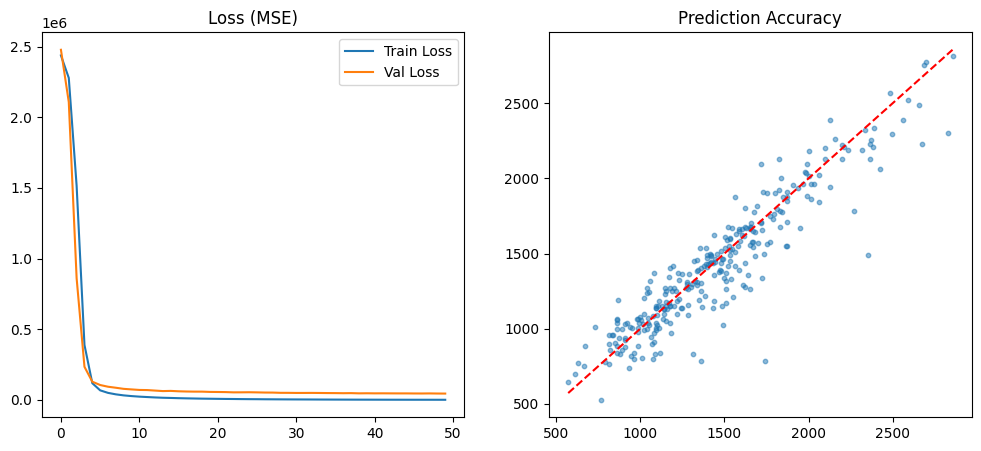

MAE: 119.01


In [2]:
df_reg = pd.read_csv("test.csv")

target_col = 'GrLivArea'

if 'Id' in df_reg.columns:
    df_reg = df_reg.drop('Id', axis=1)

for col in df_reg.columns:
    if df_reg[col].dtype == 'object':
        df_reg[col] = df_reg[col].fillna("Missing")
    else:
        df_reg[col] = df_reg[col].fillna(df_reg[col].median())

df_reg = pd.get_dummies(df_reg, drop_first=True)

X_reg = df_reg.drop(target_col, axis=1).values
y_reg = df_reg[target_col].values

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

scaler_r = StandardScaler()
X_train_r = scaler_r.fit_transform(X_train_r)
X_test_r = scaler_r.transform(X_test_r)

model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_r.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_reg.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_reg = model_reg.fit(X_train_r, y_train_r, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Val Loss')
plt.title('Loss (MSE)')
plt.legend()

y_pred_r = model_reg.predict(X_test_r).flatten()
plt.subplot(1, 2, 2)
plt.scatter(y_test_r, y_pred_r, alpha=0.5, s=10)
plt.plot([min(y_test_r), max(y_test_r)], [min(y_test_r), max(y_test_r)], 'r--')
plt.title('Prediction Accuracy')
plt.show()

print(f"MAE: {mean_absolute_error(y_test_r, y_pred_r):.2f}")

3. Завдання Класифікації (heart_disease.csv)

C:\Users\HP Victus\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.7864


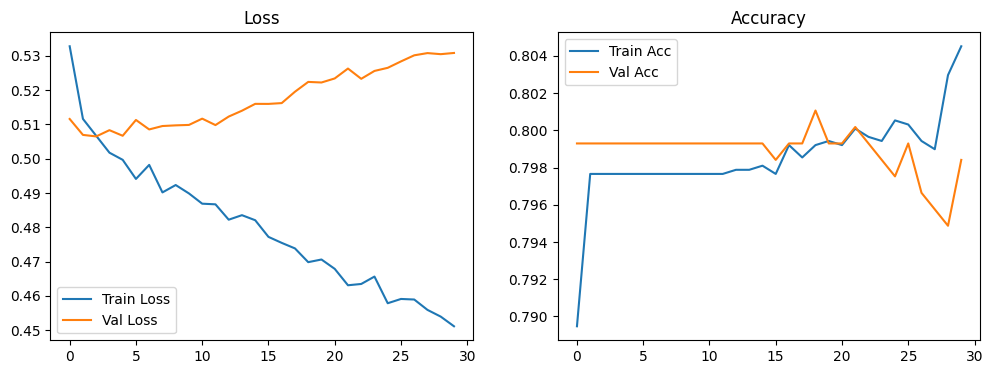

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


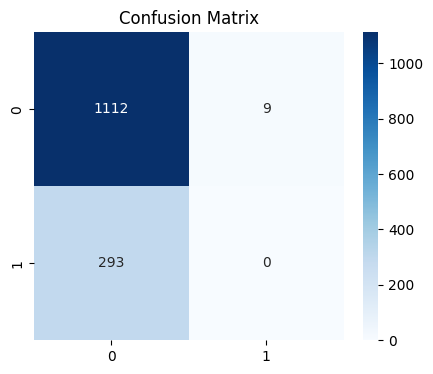

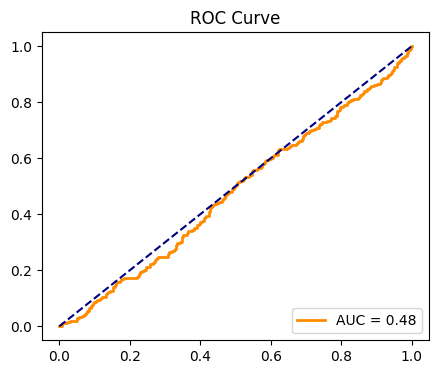

In [3]:
df_cls = pd.read_csv("heart_disease.csv")
df_cls = df_cls.dropna()

target_col_cls = 'Heart Disease Status'

le = LabelEncoder()
df_cls[target_col_cls] = le.fit_transform(df_cls[target_col_cls])

categorical_cols = df_cls.select_dtypes(include=['object']).columns
df_cls = pd.get_dummies(df_cls, columns=categorical_cols, drop_first=True)

X_cls = df_cls.drop(target_col_cls, axis=1).values
y_cls = df_cls[target_col_cls].values

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

scaler_c = StandardScaler()
X_train_c = scaler_c.fit_transform(X_train_c)
X_test_c = scaler_c.transform(X_test_c)

model_cls = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_c.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_cls.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_cls = model_cls.fit(X_train_c, y_train_c, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

loss, accuracy = model_cls.evaluate(X_test_c, y_test_c, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cls.history['loss'], label='Train Loss')
plt.plot(history_cls.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cls.history['accuracy'], label='Train Acc')
plt.plot(history_cls.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()

y_pred_c_prob = model_cls.predict(X_test_c)
y_pred_c = (y_pred_c_prob > 0.5).astype(int)

cm = confusion_matrix(y_test_c, y_pred_c)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, _ = roc_curve(y_test_c, y_pred_c_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()